## Lab | Customer Analysis Round 2


For this lab, we will be using the marketing_customer_analysis.csv file that you can find in the files_for_lab folder. Check out the files_for_lab/about.md to get more information if you are using the Online Excel.

Note: For the next labs we will be using the same data file. Please save the code, so that you can re-use it later in the labs following this lab.

#### Dealing with the data
- Show the dataframe shape.
- Standardize header names.
- Which columns are numerical?
- Which columns are categorical?
- Check and deal with NaN values.
- Datetime format - Extract the months from the dataset and store in a separate column. Then filter the data to show only the information for the first quarter , ie. January, February and March. Hint: If data from March does not exist, consider only January and February.
- BONUS: Put all the previously mentioned data transformations into a function.

In [7]:
import pandas as pd
import numpy as np

data = pd.read_csv('files_for_lab/csv_files/marketing_customer_analysis.csv')

data.shape

(9134, 24)

In [8]:
col=[]
for columns in data.columns:
    col.append(columns.lower())
data.columns=col


list(data.columns)

data.columns = data.columns

data=data.rename(columns={'employmentstatus':'employment status'})

list(data.columns)

data.head()

,customer,state,customer lifetime value,response,coverage,education,effective to date,employment status,gender,income,...,months since policy inception,number of open complaints,number of policies,policy type,policy,renew offer type,sales channel,total claim amount,vehicle class,vehicle size
0,BU79786,Washington,2763.519279,No,Basic,Bachelor,2/24/11,Employed,F,56274,...,5,0,1,Corporate Auto,Corporate L3,Offer1,Agent,384.811147,Two-Door Car,Medsize
1,QZ44356,Arizona,6979.535903,No,Extended,Bachelor,1/31/11,Unemployed,F,0,...,42,0,8,Personal Auto,Personal L3,Offer3,Agent,1131.464935,Four-Door Car,Medsize
2,AI49188,Nevada,12887.431650,No,Premium,Bachelor,2/19/11,Employed,F,48767,...,38,0,2,Personal Auto,Personal L3,Offer1,Agent,566.472247,Two-Door Car,Medsize
3,WW63253,California,7645.861827,No,Basic,Bachelor,1/20/11,Unemployed,M,0,...,65,0,7,Corporate Auto,Corporate L2,Offer1,Call Center,529.881344,SUV,Medsize
4,HB64268,Washington,2813.692575,No,Basic,Bachelor,2/3/11,Employed,M,43836,...,44,0,1,Personal Auto,Personal L1,Offer1,Agent,138.130879,Four-Door Car,Medsize


In [9]:
data.dtypes

customer                          object
state                             object
customer lifetime value          float64
response                          object
coverage                          object
education                         object
effective to date                 object
employment status                 object
gender                            object
income                             int64
location code                     object
marital status                    object
monthly premium auto               int64
months since last claim            int64
months since policy inception      int64
number of open complaints          int64
number of policies                 int64
policy type                       object
policy                            object
renew offer type                  object
sales channel                     object
total claim amount               float64
vehicle class                     object
vehicle size                      object
dtype: object

In [10]:
data.select_dtypes(['int64','float64'])

,customer lifetime value,income,monthly premium auto,months since last claim,months since policy inception,number of open complaints,number of policies,total claim amount
0,2763.519279,56274,69,32,5,0,1,384.811147
1,6979.535903,0,94,13,42,0,8,1131.464935
2,12887.431650,48767,108,18,38,0,2,566.472247
3,7645.861827,0,106,18,65,0,7,529.881344
4,2813.692575,43836,73,12,44,0,1,138.130879
...,...,...,...,...,...,...,...,...
9129,23405.987980,71941,73,18,89,0,2,198.234764
9130,3096.511217,21604,79,14,28,0,1,379.200000
9131,8163.890428,0,85,9,37,3,2,790.784983
9132,7524.442436,21941,96,34,3,0,3,691.200000


In [11]:
data.select_dtypes(['object'])

,customer,state,response,coverage,education,effective to date,employment status,gender,location code,marital status,policy type,policy,renew offer type,sales channel,vehicle class,vehicle size
0,BU79786,Washington,No,Basic,Bachelor,2/24/11,Employed,F,Suburban,Married,Corporate Auto,Corporate L3,Offer1,Agent,Two-Door Car,Medsize
1,QZ44356,Arizona,No,Extended,Bachelor,1/31/11,Unemployed,F,Suburban,Single,Personal Auto,Personal L3,Offer3,Agent,Four-Door Car,Medsize
2,AI49188,Nevada,No,Premium,Bachelor,2/19/11,Employed,F,Suburban,Married,Personal Auto,Personal L3,Offer1,Agent,Two-Door Car,Medsize
3,WW63253,California,No,Basic,Bachelor,1/20/11,Unemployed,M,Suburban,Married,Corporate Auto,Corporate L2,Offer1,Call Center,SUV,Medsize
4,HB64268,Washington,No,Basic,Bachelor,2/3/11,Employed,M,Rural,Single,Personal Auto,Personal L1,Offer1,Agent,Four-Door Car,Medsize
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9129,LA72316,California,No,Basic,Bachelor,2/10/11,Employed,M,Urban,Married,Personal Auto,Personal L1,Offer2,Web,Four-Door Car,Medsize
9130,PK87824,California,Yes,Extended,College,2/12/11,Employed,F,Suburban,Divorced,Corporate Auto,Corporate L3,Offer1,Branch,Four-Door Car,Medsize
9131,TD14365,California,No,Extended,Bachelor,2/6/11,Unemployed,M,Suburban,Single,Corporate Auto,Corporate L2,Offer1,Branch,Four-Door Car,Medsize
9132,UP19263,California,No,Extended,College,2/3/11,Employed,M,Suburban,Married,Personal Auto,Personal L2,Offer3,Branch,Four-Door Car,Large


In [12]:
data.isna().sum()

customer                         0
state                            0
customer lifetime value          0
response                         0
coverage                         0
education                        0
effective to date                0
employment status                0
gender                           0
income                           0
location code                    0
marital status                   0
monthly premium auto             0
months since last claim          0
months since policy inception    0
number of open complaints        0
number of policies               0
policy type                      0
policy                           0
renew offer type                 0
sales channel                    0
total claim amount               0
vehicle class                    0
vehicle size                     0
dtype: int64

In [13]:
data2 = data.copy()

data2= data2[data2['state'].isna()==False]

data2.isna().sum()

customer                         0
state                            0
customer lifetime value          0
response                         0
coverage                         0
education                        0
effective to date                0
employment status                0
gender                           0
income                           0
location code                    0
marital status                   0
monthly premium auto             0
months since last claim          0
months since policy inception    0
number of open complaints        0
number of policies               0
policy type                      0
policy                           0
renew offer type                 0
sales channel                    0
total claim amount               0
vehicle class                    0
vehicle size                     0
dtype: int64

In [14]:
# for "month since last claim" it might make sense, that value is NULL since there might never been one -> keep it

# number of open complaints NaN -> set to 0
data2['number of open complaints'] = data2['number of open complaints'].fillna(0)

# vehicle type ignore - missing values since it's either A or empty
## data2['vehicle type'].unique()

# depending on needs we can delete rows with missing values for vehicle class/vehicle size
data2['vehicle class'].unique()
data2['vehicle size'].unique()

# Executed for data3
data3= data2[data2['vehicle class'].isna()==False]

data3.isna().sum()
data3.shape

(9134, 24)

In [15]:
data3['effective to date'] = pd.to_datetime(data3['effective to date'],errors='coerce')

data3['month'] = data3['effective to date'].dt.month

display(data3[['month']])

,month
0,2
1,1
2,2
3,1
4,2
...,...
9129,2
9130,2
9131,2
9132,2


print(df.shape)

df.columns=[col.lower() for col in df.columns]

print("The numerical columns are: ", df.select_dtypes(np.number))

print("The numerical columns are: ", df.select_dtypes(np.object))

print("The df contains this missing values: ", df.isna().sum())

df['effective to date'] = pd.to_datetime(df['effective to date'],errors='coerce')

df['month'] = df['effective to date'].dt.month

display(df[['month']])

In [16]:
def bonus (df):
    print(df.shape)

    df.columns=[col.lower() for col in df.columns]

    print("The numerical columns are: ", df.select_dtypes(np.number))

    print("The numerical columns are: ", df.select_dtypes(np.object))

    print("The df contains this missing values: ", df.isna().sum())

    df['effective to date'] = pd.to_datetime(df['effective to date'],errors='coerce') 
    df['month'] = df['effective to date'].dt.month 
    display(df[['month']])

### Lab | Customer Analysis Round 3

For this lab, we still keep using the marketing_customer_analysis.csv file. You can find the file in the files_for_lab folder.

Get the data
Use the same jupyter file from the last lab, Customer Analysis Round 3

##### EDA (Exploratory Data Analysis) - Complete the following tasks to explore the data:

- Show DataFrame info.
- Describe DataFrame.
- Show a plot of the total number of responses.
- Show a plot of the response rate by the sales channel.
- Show a plot of the response rate by the total claim amount.
- Show a plot of the response rate by income.

In [17]:
# Show DataFrame info. 
data2=data.copy()
data2.info()
data2.dtypes

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9134 entries, 0 to 9133
Data columns (total 24 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   customer                       9134 non-null   object 
 1   state                          9134 non-null   object 
 2   customer lifetime value        9134 non-null   float64
 3   response                       9134 non-null   object 
 4   coverage                       9134 non-null   object 
 5   education                      9134 non-null   object 
 6   effective to date              9134 non-null   object 
 7   employment status              9134 non-null   object 
 8   gender                         9134 non-null   object 
 9   income                         9134 non-null   int64  
 10  location code                  9134 non-null   object 
 11  marital status                 9134 non-null   object 
 12  monthly premium auto           9134 non-null   i

customer                          object
state                             object
customer lifetime value          float64
response                          object
coverage                          object
education                         object
effective to date                 object
employment status                 object
gender                            object
income                             int64
location code                     object
marital status                    object
monthly premium auto               int64
months since last claim            int64
months since policy inception      int64
number of open complaints          int64
number of policies                 int64
policy type                       object
policy                            object
renew offer type                  object
sales channel                     object
total claim amount               float64
vehicle class                     object
vehicle size                      object
dtype: object

In [18]:
# Describe DataFrame.
display(data2.describe())
display(data2.head())

,customer lifetime value,income,monthly premium auto,months since last claim,months since policy inception,number of open complaints,number of policies,total claim amount
count,9134.000000,9134.000000,9134.000000,9134.000000,9134.000000,9134.000000,9134.000000,9134.000000
mean,8004.940475,37657.380009,93.219291,15.097000,48.064594,0.384388,2.966170,434.088794
std,6870.967608,30379.904734,34.407967,10.073257,27.905991,0.910384,2.390182,290.500092
min,1898.007675,0.000000,61.000000,0.000000,0.000000,0.000000,1.000000,0.099007
25%,3994.251794,0.000000,68.000000,6.000000,24.000000,0.000000,1.000000,272.258244
50%,5780.182197,33889.500000,83.000000,14.000000,48.000000,0.000000,2.000000,383.945434
75%,8962.167041,62320.000000,109.000000,23.000000,71.000000,0.000000,4.000000,547.514839
max,83325.381190,99981.000000,298.000000,35.000000,99.000000,5.000000,9.000000,2893.239678


,customer,state,customer lifetime value,response,coverage,education,effective to date,employment status,gender,income,...,months since policy inception,number of open complaints,number of policies,policy type,policy,renew offer type,sales channel,total claim amount,vehicle class,vehicle size
0,BU79786,Washington,2763.519279,No,Basic,Bachelor,2/24/11,Employed,F,56274,...,5,0,1,Corporate Auto,Corporate L3,Offer1,Agent,384.811147,Two-Door Car,Medsize
1,QZ44356,Arizona,6979.535903,No,Extended,Bachelor,1/31/11,Unemployed,F,0,...,42,0,8,Personal Auto,Personal L3,Offer3,Agent,1131.464935,Four-Door Car,Medsize
2,AI49188,Nevada,12887.431650,No,Premium,Bachelor,2/19/11,Employed,F,48767,...,38,0,2,Personal Auto,Personal L3,Offer1,Agent,566.472247,Two-Door Car,Medsize
3,WW63253,California,7645.861827,No,Basic,Bachelor,1/20/11,Unemployed,M,0,...,65,0,7,Corporate Auto,Corporate L2,Offer1,Call Center,529.881344,SUV,Medsize
4,HB64268,Washington,2813.692575,No,Basic,Bachelor,2/3/11,Employed,M,43836,...,44,0,1,Personal Auto,Personal L1,Offer1,Agent,138.130879,Four-Door Car,Medsize


In [19]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

Number of responses:  1308
Number of no response:  7826


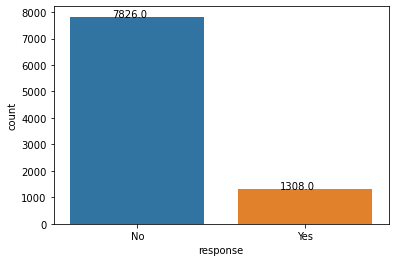

In [20]:
# Show a plot of the total number of responses.
print('Number of responses: ',data2[data2['response']=='Yes'].shape[0])
print('Number of no response: ',data2[data2['response']=='No'].shape[0])

ax = sns.countplot(x='response',data=data2)

for p in ax.patches:
   ax.annotate('{:.1f}'.format(p.get_height()), (p.get_x()+0.25,p.get_height()+0.1))

<AxesSubplot:xlabel='response', ylabel='Count'>

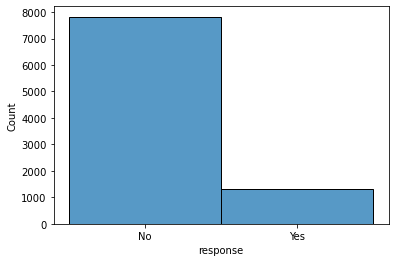

In [21]:
sns.histplot(data2, x='response')

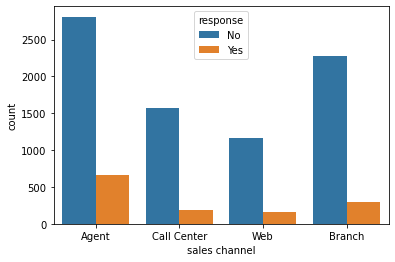

In [22]:
# Show a plot of the response rate by the sales channel.

ax = sns.countplot(x='sales channel',hue='response', data=data2)

In [23]:
#response_rate
print("The number of responses is: ", data2[data2['response']=='Yes'].shape[0])
print("The number of no responses is: ",data2[(data2['response'].isin(['Yes','No']))].shape[0])

print("The average response rate is: ",
round((data2[data2['response']=='Yes'].shape[0]/data2[(data2['response'].isin(['Yes','No']))].shape[0])*100,2))



    
#replace yes and no by 1 and 0

data3=data2.copy()
data3=data3.replace({'response':{'Yes':1,'No':0}})
display(data3.head())

list(data3['response'].unique())

The number of responses is:  1308
The number of no responses is:  9134
The average response rate is:  14.32


,customer,state,customer lifetime value,response,coverage,education,effective to date,employment status,gender,income,...,months since policy inception,number of open complaints,number of policies,policy type,policy,renew offer type,sales channel,total claim amount,vehicle class,vehicle size
0,BU79786,Washington,2763.519279,0,Basic,Bachelor,2/24/11,Employed,F,56274,...,5,0,1,Corporate Auto,Corporate L3,Offer1,Agent,384.811147,Two-Door Car,Medsize
1,QZ44356,Arizona,6979.535903,0,Extended,Bachelor,1/31/11,Unemployed,F,0,...,42,0,8,Personal Auto,Personal L3,Offer3,Agent,1131.464935,Four-Door Car,Medsize
2,AI49188,Nevada,12887.431650,0,Premium,Bachelor,2/19/11,Employed,F,48767,...,38,0,2,Personal Auto,Personal L3,Offer1,Agent,566.472247,Two-Door Car,Medsize
3,WW63253,California,7645.861827,0,Basic,Bachelor,1/20/11,Unemployed,M,0,...,65,0,7,Corporate Auto,Corporate L2,Offer1,Call Center,529.881344,SUV,Medsize
4,HB64268,Washington,2813.692575,0,Basic,Bachelor,2/3/11,Employed,M,43836,...,44,0,1,Personal Auto,Personal L1,Offer1,Agent,138.130879,Four-Door Car,Medsize


[0, 1]

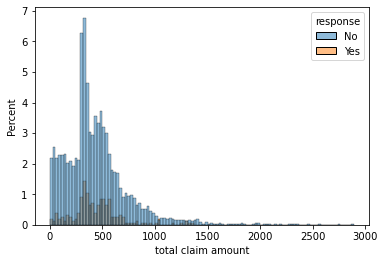

In [24]:
#Show a plot of the response rate by the total claim amount.

a = sns.histplot(data2, x='total claim amount',stat='percent',hue='response')

0.14320122618786948


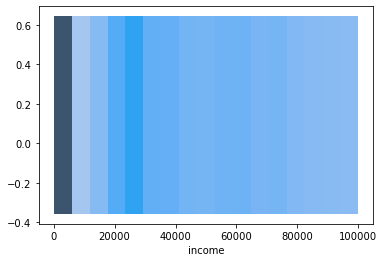

In [25]:
sns.histplot(data=data3, x=data3['income'], y=data3['response'].sum()/data3['response'].shape[0])

print(data3['response'].sum()/data3['response'].shape[0])

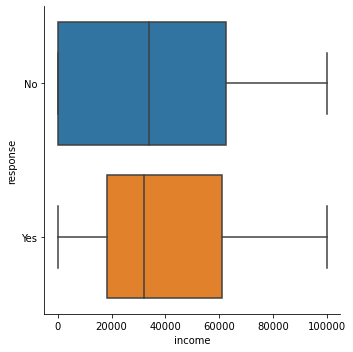

In [26]:
#Show a plot of the response rate by income.

sns.catplot(x="income",y="response", data=data2, kind='box')



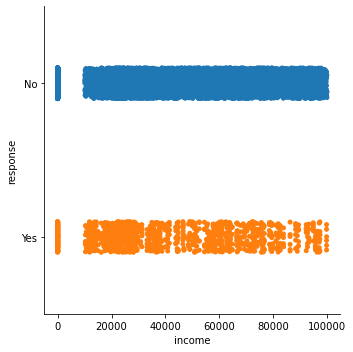

In [27]:
sns.catplot(x="income",y="response", data=data2)

### Lab | Customer Analysis Round 4

In today's lesson we talked about continuous distributions (mainly normal distribution), linear regression and how multicollinearity can impact the model. In this lab, we will test your knowledge on those things using the marketing_customer_analysis.csv file. You have been using the same data in the previous labs (round 2 and 3). You can continue using the same jupyter file. The file can be found in the files_for_lab folder.

##### Get the data
Use the jupyter file from the last lab (Customer Analysis Round 3)

##### Complete the following task

- Check the data types of the columns. Get the numeric data into dataframe called numerical and categorical columns in a dataframe called categoricals. (You can use np.number and np.object to select the numerical data types and categorical data types respectively)

- Now we will try to check the normality of the numerical variables visually
- Use seaborn library to construct distribution plots for the numerical variables
- Use Matplotlib to construct histograms
- Do the distributions for different numerical variables look like a normal distribution
- For the numerical variables, check the multicollinearity between the features. Please note that we will use the column total_claim_amount later as the target variable.
- Drop one of the two features that show a high correlation between them (greater than 0.9). Write code for both the correlation matrix and for seaborn heatmap. If there is no pair of features that have a high correlation, then do not drop any features

In [28]:
#Check the data types of the columns. 
#Get the numeric data into dataframe called numerical and categorical columns in a dataframe called categoricals. 
#(You can use np.number and np.object to select the numerical data types and categorical data types respectively)

print(data2.dtypes)

numericals= data2.select_dtypes(['number'])
categoricals= data2.select_dtypes(['object'])

display(numericals.head())
display(categoricals.head())

customer                          object
state                             object
customer lifetime value          float64
response                          object
coverage                          object
education                         object
effective to date                 object
employment status                 object
gender                            object
income                             int64
location code                     object
marital status                    object
monthly premium auto               int64
months since last claim            int64
months since policy inception      int64
number of open complaints          int64
number of policies                 int64
policy type                       object
policy                            object
renew offer type                  object
sales channel                     object
total claim amount               float64
vehicle class                     object
vehicle size                      object
dtype: object


,customer lifetime value,income,monthly premium auto,months since last claim,months since policy inception,number of open complaints,number of policies,total claim amount
0,2763.519279,56274,69,32,5,0,1,384.811147
1,6979.535903,0,94,13,42,0,8,1131.464935
2,12887.431650,48767,108,18,38,0,2,566.472247
3,7645.861827,0,106,18,65,0,7,529.881344
4,2813.692575,43836,73,12,44,0,1,138.130879


,customer,state,response,coverage,education,effective to date,employment status,gender,location code,marital status,policy type,policy,renew offer type,sales channel,vehicle class,vehicle size
0,BU79786,Washington,No,Basic,Bachelor,2/24/11,Employed,F,Suburban,Married,Corporate Auto,Corporate L3,Offer1,Agent,Two-Door Car,Medsize
1,QZ44356,Arizona,No,Extended,Bachelor,1/31/11,Unemployed,F,Suburban,Single,Personal Auto,Personal L3,Offer3,Agent,Four-Door Car,Medsize
2,AI49188,Nevada,No,Premium,Bachelor,2/19/11,Employed,F,Suburban,Married,Personal Auto,Personal L3,Offer1,Agent,Two-Door Car,Medsize
3,WW63253,California,No,Basic,Bachelor,1/20/11,Unemployed,M,Suburban,Married,Corporate Auto,Corporate L2,Offer1,Call Center,SUV,Medsize
4,HB64268,Washington,No,Basic,Bachelor,2/3/11,Employed,M,Rural,Single,Personal Auto,Personal L1,Offer1,Agent,Four-Door Car,Medsize


In [29]:
#Now we will try to check the normality of the numerical variables visually
    #Use seaborn library to construct distribution plots for the numerical variables
    #Use Matplotlib to construct histograms
    #Do the distributions for different numerical variables look like a normal distribution

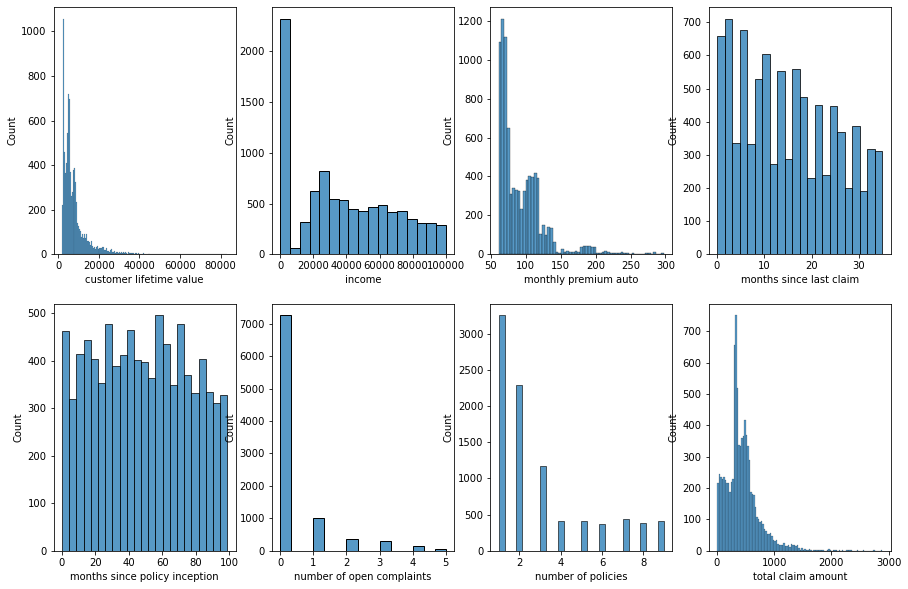

In [88]:
fig, ax = plt.subplots(2,4,figsize=(15,10)) # now ax = np.array of two elements
sns.histplot(data2['customer lifetime value'], ax=ax[0,0])
sns.histplot(data2['income'], ax=ax[0,1])
sns.histplot(data2['monthly premium auto'], ax=ax[0,2])
sns.histplot(data2['months since last claim'], ax=ax[0,3])
sns.histplot(data2['months since policy inception'], ax=ax[1,0])
sns.histplot(data2['number of open complaints'], ax=ax[1,1])
sns.histplot(data2['number of policies'], ax=ax[1,2])
sns.histplot(data2['total claim amount'], ax=ax[1,3])
plt.show()

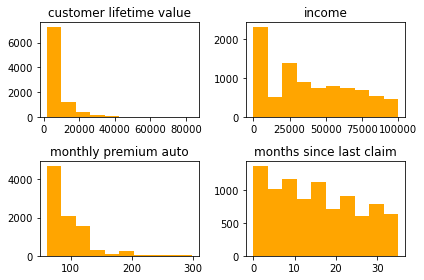

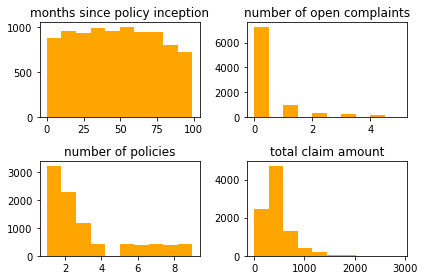

In [89]:
import numpy as np
import matplotlib.pyplot as plt

fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(nrows=2, ncols=2)   

ax1.hist(x=data2['customer lifetime value'],color='orange')
ax1.set_title('customer lifetime value')
ax2.hist(x=data2['income'], color='orange' )
ax2.set_title('income')
ax3.hist(x=data2['monthly premium auto'],color='orange')
ax3.set_title('monthly premium auto')
ax4.hist(x=data2['months since last claim'],color='orange')
ax4.set_title('months since last claim')
fig.tight_layout()
plt.show()

fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(nrows=2, ncols=2) 
ax1.hist(x=data2['months since policy inception'],color='orange')
ax1.set_title('months since policy inception')
ax2.hist(x=data2['number of open complaints'],color='orange')
ax2.set_title('number of open complaints')
ax3.hist(x=data2['number of policies'],color='orange')
ax3.set_title('number of policies')
ax4.hist(x=data2['total claim amount'],color='orange')
ax4.set_title('total claim amount')
fig.tight_layout()
plt.show()


The variables are not normally distributed. Most of them are positively skewed

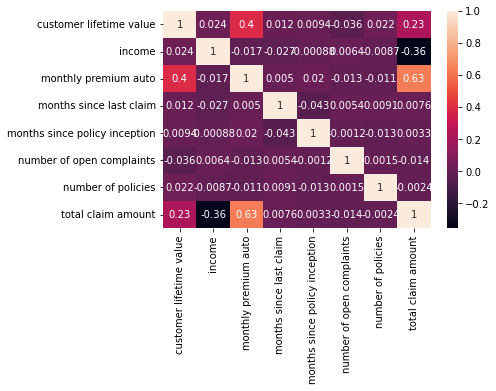

In [32]:
#For the numerical variables, check the multicollinearity between the features. 
#Please note that we will use the column total_claim_amount later as the target variable.

correlations_matrix = numericals.corr()
correlations_matrix

correlations_matrix = numericals.corr()
sns.heatmap(correlations_matrix, annot=True)
plt.show()

In [33]:
#Drop one of the two features that show a high correlation between them (greater than 0.9). 
#Write code for both the correlation matrix and for seaborn heatmap. 
#If there is no pair of features that have a high correlation, then do not drop any features

# There is no variable with correlation >0.9 that needs to be dropped

### Lab | Customer Analysis Round 5

For this lab, we still keep using the marketing_customer_analysis.csv file that you can find in the files_for_lab folder.

##### Get the data
We are using the marketing_customer_analysis.csv file.

##### Dealing with the data
Already done in the round 2.

##### Explore the data
Done in the round 3.

##### Processing Data
(Further processing...)

- X-y split.
- Normalize (numerical).

In [54]:
# X-y split

y = numericals['total claim amount']
X_num = numericals.drop(['total claim amount'],axis=1)

display(y.head())
X.head()

0     384.811147
1    1131.464935
2     566.472247
3     529.881344
4     138.130879
Name: total claim amount, dtype: float64

,customer lifetime value,income,monthly premium auto,months since last claim,months since policy inception,number of open complaints,number of policies
0,2763.519279,56274,69,32,5,0,1
1,6979.535903,0,94,13,42,0,8
2,12887.431650,48767,108,18,38,0,2
3,7645.861827,0,106,18,65,0,7
4,2813.692575,43836,73,12,44,0,1


In [55]:
# Normalizing (numerical)


In [58]:
from sklearn.preprocessing import MinMaxScaler  # sets for each column the minimum = 0 and the maximum = 1
MinMaxtransformer = MinMaxScaler()
MinMaxtransformer.fit(X_num) # fit () Determine the min and the max of each column 

x_normalized = MinMaxtransformer.transform(X_num) # .transform() applies the transformation x normalized will be np.array
x_normalized = pd.DataFrame(x_normalized,columns=X_num.columns)
x_normalized.head()

,customer lifetime value,income,monthly premium auto,months since last claim,months since policy inception,number of open complaints,number of policies
0,0.010629,0.562847,0.033755,0.914286,0.050505,0.0,0.000
1,0.062406,0.000000,0.139241,0.371429,0.424242,0.0,0.875
2,0.134960,0.487763,0.198312,0.514286,0.383838,0.0,0.125
3,0.070589,0.000000,0.189873,0.514286,0.656566,0.0,0.750
4,0.011245,0.438443,0.050633,0.342857,0.444444,0.0,0.000


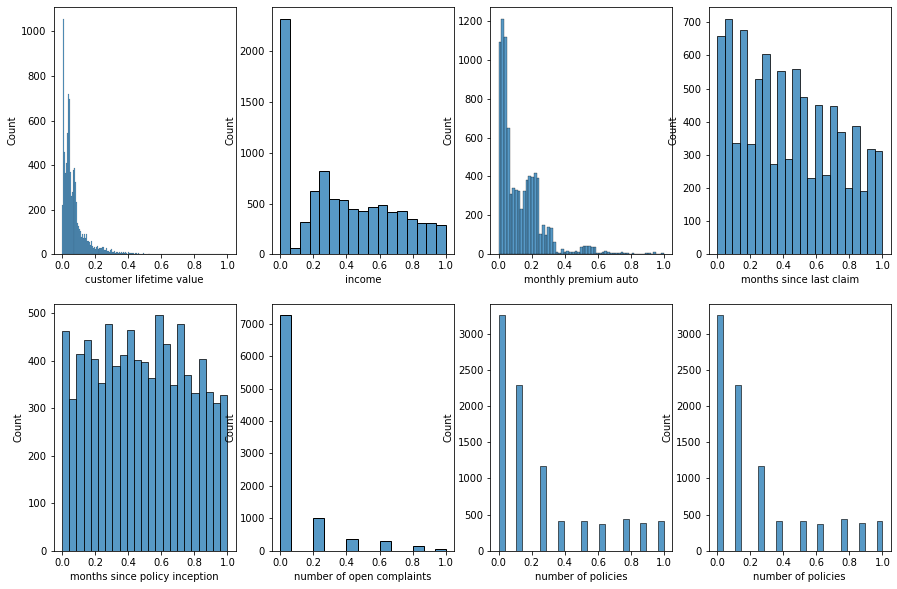

In [60]:
fig, ax = plt.subplots(2,4,figsize=(15,10)) # now ax = np.array of two elements
sns.histplot(x_normalized['customer lifetime value'], ax=ax[0,0])
sns.histplot(x_normalized['income'], ax=ax[0,1])
sns.histplot(x_normalized['monthly premium auto'], ax=ax[0,2])
sns.histplot(x_normalized['months since last claim'], ax=ax[0,3])
sns.histplot(x_normalized['months since policy inception'], ax=ax[1,0])
sns.histplot(x_normalized['number of open complaints'], ax=ax[1,1])
sns.histplot(x_normalized['number of policies'], ax=ax[1,2])
sns.histplot(x_normalized['number of policies'], ax=ax[1,3])
plt.show()

### Lab | Customer Analysis Round 6

For this lab, we still keep using the marketing_customer_analysis.csv file that you can find in the files_for_lab folder.

##### Get the data
We are using the marketing_customer_analysis.csv file.

##### Dealing with the data
Already done in the round 2.

##### Explore the data
Done in the round 3.

##### Processing Data
(Further processing...)

- X-y split. (done)
- Normalize (numerical). (done)
- One Hot/Label Encoding (categorical).
- Concat DataFrames

##### Linear Regression
- Train-test split.
- Apply linear regression.

##### Model Validation
- R2.
- MSE.
- RMSE.
- MAE.

In [57]:
# One Hot/Label Encoding (categorical).

X_cat=categoricals.copy()

X_cat.describe()
X_cat.head()

,customer,state,response,coverage,education,effective to date,employment status,gender,location code,marital status,policy type,policy,renew offer type,sales channel,vehicle class,vehicle size
0,BU79786,Washington,No,Basic,Bachelor,2/24/11,Employed,F,Suburban,Married,Corporate Auto,Corporate L3,Offer1,Agent,Two-Door Car,Medsize
1,QZ44356,Arizona,No,Extended,Bachelor,1/31/11,Unemployed,F,Suburban,Single,Personal Auto,Personal L3,Offer3,Agent,Four-Door Car,Medsize
2,AI49188,Nevada,No,Premium,Bachelor,2/19/11,Employed,F,Suburban,Married,Personal Auto,Personal L3,Offer1,Agent,Two-Door Car,Medsize
3,WW63253,California,No,Basic,Bachelor,1/20/11,Unemployed,M,Suburban,Married,Corporate Auto,Corporate L2,Offer1,Call Center,SUV,Medsize
4,HB64268,Washington,No,Basic,Bachelor,2/3/11,Employed,M,Rural,Single,Personal Auto,Personal L1,Offer1,Agent,Four-Door Car,Medsize


In [129]:
X_location=pd.DataFrame(X_cat[X_cat.columns[8]])

display(X_location)

X_cat['location code'].unique()

from sklearn.preprocessing import OneHotEncoder

encoder = OneHotEncoder()
encoder.fit(X_location) # This determines how many unique values has each categorical column

print(encoder.categories_)
encoded = encoder.transform(X_location).toarray()
X_location_enc = pd.DataFrame(encoded,columns=encoder.categories_)
X_location_enc = X_location_enc.drop(['Rural'], axis=1)
X_location_enc = X_location_enc.rename(columns={'Suburban' : 'suburban', 'Urban' : 'urban'})
X_location_enc.head()

,location code
0,Suburban
1,Suburban
2,Suburban
3,Suburban
4,Rural
...,...
9129,Urban
9130,Suburban
9131,Suburban
9132,Suburban


[array(['Rural', 'Suburban', 'Urban'], dtype=object)]


,suburban,urban
0,1.0,0.0
1,1.0,0.0
2,1.0,0.0
3,1.0,0.0
4,0.0,0.0


In [106]:
X_gender=pd.DataFrame(X_cat[X_cat.columns[7]])

display(X_gender)

from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()
label_encoder.fit(X_gender)
X_gender_trans = label_encoder.transform(X_gender) # ordered wrt value counts
X_gender_trans = pd.DataFrame(X_gender_trans,columns=X_gender.columns)
display(X_gender_trans)
X_gender_trans['gender'].value_counts()

,gender
0,F
1,F
2,F
3,M
4,M
...,...
9129,M
9130,F
9131,M
9132,M


/Users/robertkammerer/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


,gender
0,0
1,0
2,0
3,1
4,1
...,...
9129,1
9130,0
9131,1
9132,1


0    4658
1    4476
Name: gender, dtype: int64

In [132]:
# Concat DataFrames

X_new = pd.concat([x_normalized,X_gender_trans, X_location_enc],axis=1)
display(X_new)

,customer lifetime value,income,monthly premium auto,months since last claim,months since policy inception,number of open complaints,number of policies,gender,"(suburban,)","(urban,)"
0,0.010629,0.562847,0.033755,0.914286,0.050505,0.0,0.000,0,1.0,0.0
1,0.062406,0.000000,0.139241,0.371429,0.424242,0.0,0.875,0,1.0,0.0
2,0.134960,0.487763,0.198312,0.514286,0.383838,0.0,0.125,0,1.0,0.0
3,0.070589,0.000000,0.189873,0.514286,0.656566,0.0,0.750,1,1.0,0.0
4,0.011245,0.438443,0.050633,0.342857,0.444444,0.0,0.000,1,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...
9129,0.264137,0.719547,0.050633,0.514286,0.898990,0.0,0.125,1,0.0,1.0
9130,0.014719,0.216081,0.075949,0.400000,0.282828,0.0,0.000,0,1.0,0.0
9131,0.076951,0.000000,0.101266,0.257143,0.373737,0.6,0.125,1,1.0,0.0
9132,0.069098,0.219452,0.147679,0.971429,0.030303,0.0,0.250,1,1.0,0.0


In [108]:
# Train-test split.
X_new
y

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_new, y, test_size=0.2, random_state=100)

print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(7307, 10)
(1827, 10)
(7307,)
(1827,)


In [109]:
# Apply linear regression
from sklearn.linear_model import LinearRegression
lm = LinearRegression()
lm.fit(X_train,y_train)

LinearRegression()

In [114]:
# R2.
from sklearn.metrics import r2_score
y_pred_train = lm.predict(X_train)
print("r2 for train data: ",r2_score(y_train, y_pred_train))

y_pred_test = lm.predict(X_test)
print("r2 for test data: ",r2_score(y_test, y_pred_test))

r2 for train data:  0.7480296825080555
r2 for test data:  0.7528937660330632


In [119]:
# MSE.
from sklearn.metrics import mean_squared_error
mse=mean_squared_error(y_test,y_pred_test)
mse

19682.550977302344

In [116]:
# RMSE.
rmse=np.sqrt(mean_squared_error(y_test,y_pred_test))
rmse

140.2945151362032

In [118]:
# MAE.
from sklearn.metrics import mean_absolute_error, r2_score
mae = mean_absolute_error(y_test, y_pred_test)
print(mae)

101.71615228023433


### Lab | Customer Analysis Round 7
For this lab, we still keep using the marketing_customer_analysis.csv file that you can find in the files_for_lab folder.

Remember the previous rounds. Follow the steps as shown in previous lectures and try to improve the accuracy of the model. Include both categorical columns in the exercise. Some approaches you can try in this exercise:

- use the concept of multicollinearity and remove insignificant variables
- use a different method of scaling the numerical variables
- use a different ratio of train test split
- use the transformation on numerical columns which align it more towards a normal distribution

##### Get the data
We are using the marketing_customer_analysis.csv file.

##### Dealing with the data
Already done in rounds 2 to 7.

##### Bonus: Build a function, from round 2 and round 7, to clean and process the data.

Explore the data
Done in the round 3.

Modeling
Description:

##### Try to improve the linear regression model.

In [137]:
# Model optimization


X_new2 = X_new.drop(['months since last claim','months since policy inception','number of open complaints',
                    'number of policies','gender'],axis=1)

X_new2

# Train-test split.
from sklearn.model_selection import train_test_split
X_train2, X_test2, y_train2, y_test2 = train_test_split(X_new2, y, test_size=0.2, random_state=100)

print(X_train2.shape)
print(X_test2.shape)
print(y_train2.shape)
print(y_test2.shape)

from sklearn.linear_model import LinearRegression
lm2 = LinearRegression()
lm2.fit(X_train2,y_train2)

(7307, 5)
(1827, 5)
(7307,)
(1827,)


LinearRegression()

In [139]:
# R2.
from sklearn.metrics import r2_score
y_pred_train2 = lm.predict(X_train2)
print("r2 for train data: ",r2_score(y_train2, y_pred_train2))

y_pred_test2 = lm.predict(X_test2)
print("r2 for test data: ",r2_score(y_test2, y_pred_test2))

r2 for train data:  0.7470268337006591
r2 for test data:  0.7520995354219469


In [141]:
# MSE.
from sklearn.metrics import mean_squared_error
mse=mean_squared_error(y_test2,y_pred_test2)
mse

19745.813179311877

In [ ]:
# Build a function for all steps of data cleaning